In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

In [3]:
print('Airlines:\n{}'.format(airlines.iloc[0]))

Airlines:
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object



In [4]:
print('Airports:\n{}'.format(airports.iloc[0]))

Airports:
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object


In [5]:
print('Routes:\n{}'.format(routes.iloc[0]))

Routes:
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


/Users/mike/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mike/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


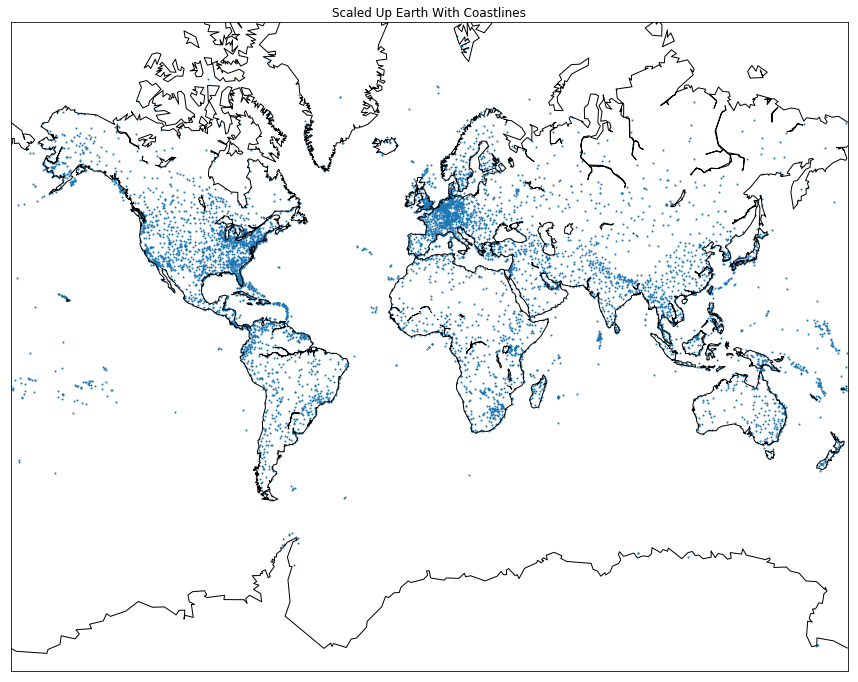

In [20]:
fix, ax = plt.subplots(figsize=(15,20))
ax.set_title('Scaled Up Earth With Coastlines')
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()

In [22]:
geo_routes = pd.read_csv('geo_routes.csv')

/Users/mike/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mike/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


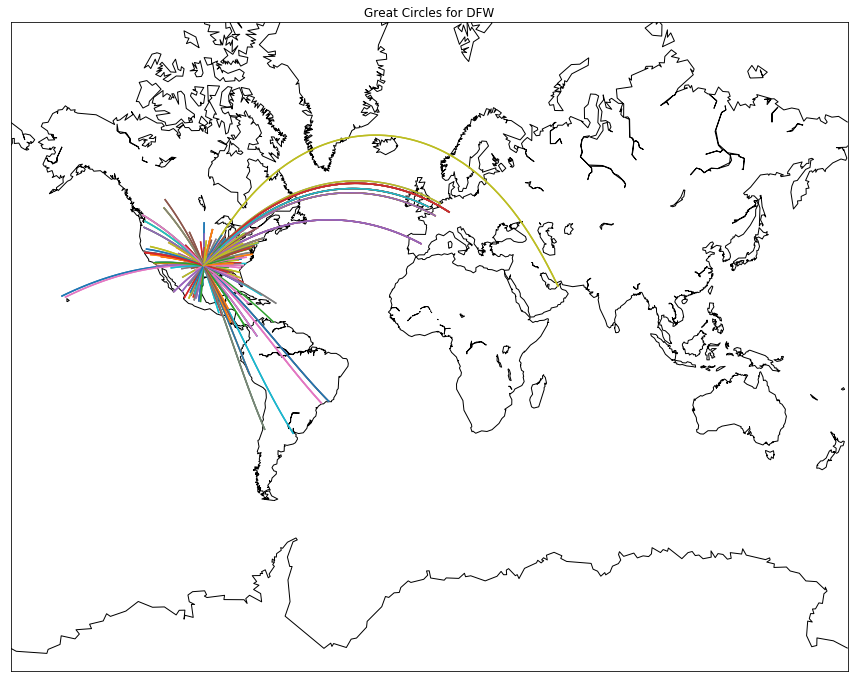

In [23]:
fig, ax = plt.subplots(figsize=(15,20))
ax.set_title('Great Circles for DFW')
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        start_lon, start_lat = row['start_lon'], row['start_lat']
        end_lon, end_lat = row['end_lon'], row['end_lat']
        
        if abs(end_lon - start_lon) < 180:
            if abs(end_lat - start_lat) <180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)


dfw = geo_routes[geo_routes['source'] == 'DFW']


create_great_circles(dfw)